In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
t_data = ['신문 전자 삼성 전자 주식 신문','삼성 신문','한화 신문','기록 신문']
tk = Tokenizer()
tk.fit_on_texts(t_data)
tk.word_index

{'신문': 1, '전자': 2, '삼성': 3, '주식': 4, '한화': 5, '기록': 6}

In [2]:
tk.texts_to_matrix(t_data) # 데이터의 유무를 확인.

array([[0., 1., 1., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1.]])

In [3]:
tk.texts_to_matrix(t_data,mode='count') # 횟수를 표현

array([[0., 2., 2., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1.]])

In [4]:
tk.texts_to_matrix(t_data,mode='tfidf')

array([[0.        , 0.99520933, 1.8601123 , 0.84729786, 1.09861229,
        0.        , 0.        ],
       [0.        , 0.58778666, 0.        , 0.84729786, 0.        ,
        0.        , 0.        ],
       [0.        , 0.58778666, 0.        , 0.        , 0.        ,
        1.09861229, 0.        ],
       [0.        , 0.58778666, 0.        , 0.        , 0.        ,
        0.        , 1.09861229]])

뉴스정보 연습

In [5]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [6]:
w_data = fetch_20newsgroups()
print(w_data.keys())
data = w_data.data

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [7]:
len(data),len(w_data.target)

(11314, 11314)

In [8]:
X_data = w_data.data
Y_data = w_data.target

In [9]:
import numpy as np

In [10]:
np.unique(Y_data) # 20개

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [11]:
len(np.unique(X_data))

11314

In [12]:
all_data = pd.DataFrame()
all_data['X'] = X_data
all_data['Y'] = Y_data
all_data

,X,Y
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14
...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1


In [13]:
n_l=[]
for i in X_data:
    n = len(i)
    n_l.append(n)
max(n_l),min(n_l)

(75154, 125)

In [14]:
type(X_data[0])

str

In [15]:
tk = Tokenizer(num_words=10000)
tk.fit_on_texts(X_data)

#len(tk.word_index)
#type(tk.word_index.keys())
#list(tk.word_index.items())[:100]

t_x_data = tk.texts_to_matrix(X_data)
t_x_data

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
t1_x_data = tk.texts_to_matrix(X_data,mode='count')
t1_x_data

array([[ 0.,  6.,  2., ...,  0.,  0.,  0.],
       [ 0.,  4.,  1., ...,  0.,  0.,  0.],
       [ 0., 21.,  6., ...,  0.,  0.,  0.],
       ...,
       [ 0., 12.,  1., ...,  0.,  0.,  0.],
       [ 0.,  3.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [17]:
t2_x_data = tk.texts_to_matrix(X_data,mode='tfidf')
t2_x_data

array([[0.        , 2.03303026, 1.26800369, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.73776026, 0.74890341, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 2.94532413, 2.09075818, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 2.53779767, 0.74890341, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.52826285, 1.26800369, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [18]:
Y_data = to_categorical(Y_data)
Y_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
len(Y_data[0])

20

In [20]:
X_data1 = t_x_data
X_data2 = t1_x_data
X_data3 = t2_x_data
Y_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
from sklearn.model_selection import train_test_split
t_x,tt_x,t_y,tt_y = train_test_split(X_data1,Y_data,random_state=1)
len(t_x),len(tt_x),len(t_y),len(tt_y)

(8485, 2829, 8485, 2829)

In [22]:
# 단어의 유무 특징을 갖는 data
t_x_1,tt_x_1,t_y_1,tt_y_1 = train_test_split(X_data1,Y_data,random_state=1)

In [23]:
# 단어 빈도수를 특징으로 갖는 data
t_x_2,tt_x_2,t_y_2,tt_y_2 = train_test_split(X_data2,Y_data,random_state=1)

In [24]:
# 단어 가중치 특징을 갖는 data
t_x_3,tt_x_3,t_y_3,tt_y_3 = train_test_split(X_data3,Y_data,random_state=1)

In [25]:
Y = w_data.target

In [26]:
w_all_data = pd.DataFrame(X_data3)
w_all_data['Y'] = Y
w_all_data

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Y
0,0.0,2.033030,1.268004,1.600426,1.595462,0.0,0.000000,0.782792,1.687681,1.762122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,0.0,1.737760,0.748903,1.600426,1.287208,0.0,1.657382,0.782792,1.361610,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,2.945324,2.090758,2.129029,2.649386,0.0,2.060808,2.042648,2.476453,2.191043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,1.737760,0.748903,0.762612,0.760246,0.0,0.000000,0.782792,0.000000,0.839661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,2.145287,0.748903,0.762612,1.595462,0.0,1.337166,1.867973,0.804189,2.003678,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,0.0,2.474434,2.306204,1.600426,2.710238,0.0,2.431994,1.642778,2.245102,2.191043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
11310,0.0,2.242528,0.748903,0.762612,2.341133,0.0,1.337166,0.782792,1.919032,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
11311,0.0,2.537798,0.748903,1.600426,1.983815,0.0,1.657382,1.642778,1.361610,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
11312,0.0,1.528263,1.268004,0.000000,2.122424,0.0,1.884580,1.867973,1.919032,2.003678,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [28]:
t_x_1[0].shape

(10000,)

In [29]:
m = Sequential()
m.add(Dense(256,input_shape=(10000,),activation='relu'))
m.add(Dropout(0.5))
m.add(Dense(128,activation='relu'))
m.add(Dropout(0.5))
m.add(Dense(20,activation='softmax')) # 다중분류 =>softmax
m.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
hy = m.fit(t_x_1,t_y_1,epochs=10,validation_data=(tt_x_1,tt_y_1))

Epoch 1/10
266/266 [==============================] - 4s 14ms/step - loss: 1.9743 - accuracy: 0.4235 - val_loss: 0.6867 - val_accuracy: 0.8572
Epoch 2/10
266/266 [==============================] - 3s 13ms/step - loss: 0.6572 - accuracy: 0.8128 - val_loss: 0.4238 - val_accuracy: 0.8869
Epoch 3/10
266/266 [==============================] - 3s 13ms/step - loss: 0.3222 - accuracy: 0.9071 - val_loss: 0.3669 - val_accuracy: 0.9007
Epoch 4/10
266/266 [==============================] - 3s 12ms/step - loss: 0.1990 - accuracy: 0.9494 - val_loss: 0.3657 - val_accuracy: 0.9003
Epoch 5/10
266/266 [==============================] - 3s 12ms/step - loss: 0.1391 - accuracy: 0.9655 - val_loss: 0.3751 - val_accuracy: 0.9039
Epoch 6/10
266/266 [==============================] - 3s 12ms/step - loss: 0.1013 - accuracy: 0.9778 - val_loss: 0.4114 - val_accuracy: 0.8925
Epoch 7/10
266/266 [==============================] - 3s 12ms/step - loss: 0.0932 - accuracy: 0.9768 - val_loss: 0.3780 - val_accuracy: 0.9053

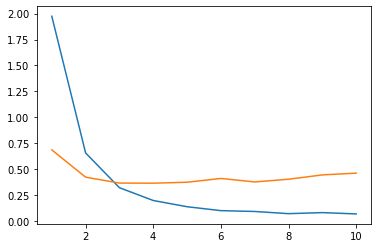

In [30]:
import matplotlib.pyplot as plt
ec = range(1,len(hy.history['accuracy'])+1)
plt.plot(ec,hy.history['loss'])
plt.plot(ec,hy.history['val_loss'])

In [31]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data 수집

In [32]:
data = fetch_20newsgroups()
X_data = data.data
Y_data = data.target

data전처리

In [33]:
def 텍스트_전처리기(X_data,Y_data,mode):
    tk = Tokenizer(num_words=10000)
    tk.fit_on_texts(X_data)
    X=tk.texts_to_matrix(X_data,mode=mode)
    Y=to_categorical(Y_data)
    t_x,tt_x,t_y,tt_y=train_test_split(X,Y)
    return t_x,tt_x,t_y,tt_y

모델 생성 및 학습

In [34]:
def 텍스트_분류기(t_all):
    m = Sequential()
    m.add(Dense(256,input_shape=(10000,),activation='relu'))
    m.add(Dropout(0.5))
    m.add(Dense(128,activation='relu'))
    m.add(Dropout(0.5))
    m.add(Dense(20,activation='softmax'))
    m.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    hy = m.fit(t_all[0],t_all[2],epochs=10,validation_data=(t_all[1],t_all[3]))
    return hy

In [35]:
t_all = 텍스트_전처리기(X_data,Y_data,mode='tfidf')
hy = 텍스트_분류기(t_all)

Epoch 1/10
266/266 [==============================] - 4s 13ms/step - loss: 1.9959 - accuracy: 0.4359 - val_loss: 0.6984 - val_accuracy: 0.8537
Epoch 2/10
266/266 [==============================] - 3s 13ms/step - loss: 0.7148 - accuracy: 0.8118 - val_loss: 0.5278 - val_accuracy: 0.8858
Epoch 3/10
266/266 [==============================] - 3s 13ms/step - loss: 0.4614 - accuracy: 0.8867 - val_loss: 0.5016 - val_accuracy: 0.8883
Epoch 4/10
266/266 [==============================] - 3s 13ms/step - loss: 0.2779 - accuracy: 0.9287 - val_loss: 0.5579 - val_accuracy: 0.8883
Epoch 5/10
266/266 [==============================] - 3s 12ms/step - loss: 0.2006 - accuracy: 0.9533 - val_loss: 0.5409 - val_accuracy: 0.8950
Epoch 6/10
266/266 [==============================] - 3s 12ms/step - loss: 0.2298 - accuracy: 0.9540 - val_loss: 0.6226 - val_accuracy: 0.8947
Epoch 7/10
266/266 [==============================] - 3s 12ms/step - loss: 0.1762 - accuracy: 0.9629 - val_loss: 0.6195 - val_accuracy: 0.8971

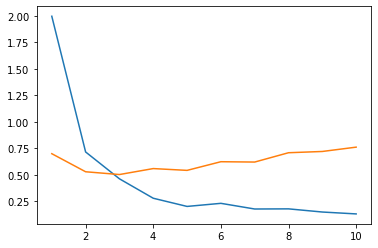

In [36]:
ec = range(1,len(hy.history['accuracy'])+1)
plt.plot(ec,hy.history['loss'])
plt.plot(ec,hy.history['val_loss'])